# BhargavaGaggainpali_DSC680_Week8_Project2_Code

#                                 Credit Card default Prediction

In [1]:
# Bhargava Gaggainpali
# DSC680 - Applied Data Science
# bgaggainpali/bgaggainpali_DSC680 (github.com)


In [2]:
#Import required support python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
import sklearn.decomposition
from sklearn.decomposition import PCA

In [3]:
# Step 1: load the data in file into a data frame
File = "UCI_Credit_Card.csv"
data = pd.read_csv(File)

In [4]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (30000, 25)


In [5]:
#Step 3:  Look at the sample data by taking first 5 rows
print(data.head(5))

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [6]:
#Step 4:  what type of variables are in the table 
print("Describe Data")
print(data.describe())


Describe Data
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904

From the above stats and general observation, we can remove the features those would not have any impact on target variable, i.e a customer would default or not. ID is a sequence number, to identify each customer uniquely. So, this can be removed.

In [7]:
#Step 5: Drop Features not helpful for final model
data.drop('ID', axis = 1, inplace =True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

Rename Features and draw plots to show how each of the variables impact on target feature, i.e. default/not default

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

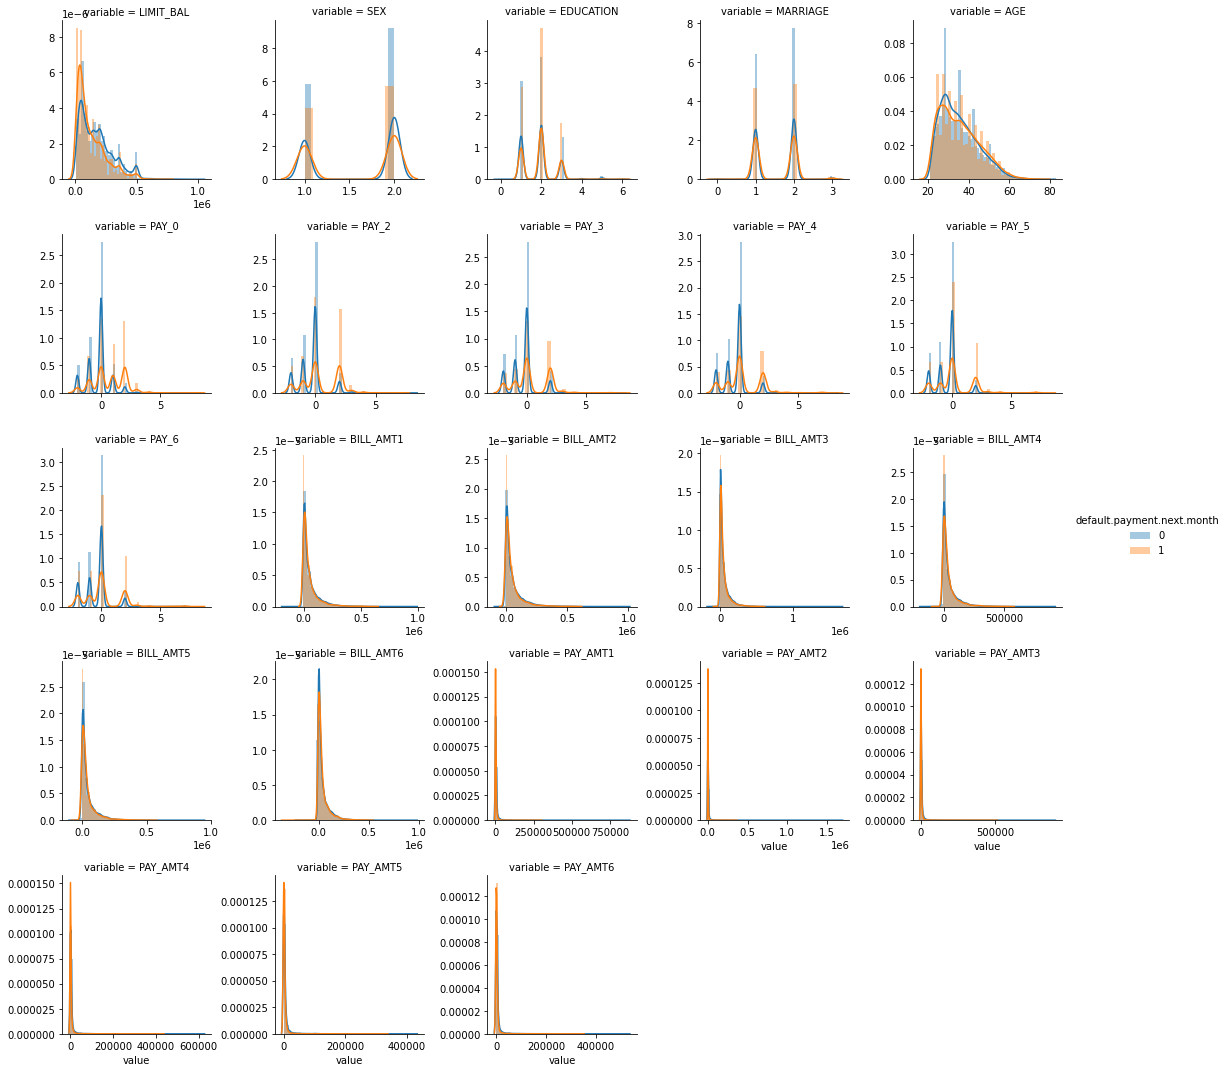

In [8]:
output = 'default.payment.next.month'

# Let's do a little EDA
cols = [ f for f in data.columns if data.dtypes[ f ] != "object"]
cols.remove( output )

f = pd.melt( data, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

Below are the observations made from above plots:

1. Customers with low LIMIT_BAL have higher Default rate.
2. Default rate low among Femlaes(Sex=2)
3. Customers with highly educated are less like to default (EDUCATION=1 or 2)
4. Customers with Marital status single are less like to default (MARRIAGE=2)
5. People in the age group 30-40 years are less likely to default

Feature name default.payment.next.month is lengthy, so rename it to Default

In [9]:
#rename the feature
data.rename(columns={"default.payment.next.month": "Default"}, inplace=True)

# Separating features and target
y = data.Default     # target default=1 or non-default=0
features = data.drop('Default', axis = 1, inplace = False)

Observe distinct values in Education and categorise correctly

In [10]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [11]:
data['EDUCATION']=np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 6, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])
data['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

Observe distinct values in Education and categorise correctly

In [12]:
data['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [13]:
data['MARRIAGE']=np.where(data['MARRIAGE'] == 0, 3, data['MARRIAGE'])
data['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

Calculate the total number of customers "Default" vs "No Default"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


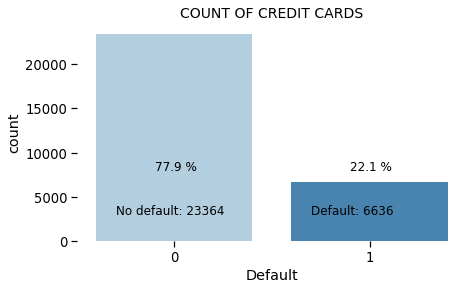

In [14]:
# The frequency of defaults
yes = data.Default.sum()
no = len(data)-yes

# Percentage
yes_perc = round(yes/len(data)*100, 1)
no_perc = round(no/len(data)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Default',data=data, palette="Blues")
plt.annotate('No default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);

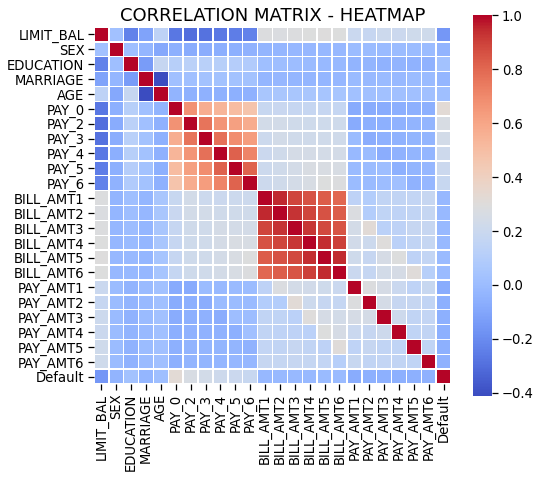

In [15]:
#  Draw a correlations matrix, it is defined via Pearson function  
corr = data.corr() # corr() is a function used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [16]:
# Filtering the data into numerical variables
df_Nums = data[['AGE','PAY_0','BILL_AMT1','PAY_AMT1']]
print('Number of observations in the Selected dataframe ',data.shape)
print('Number of observations in the Numerical Variables dataframe ',df_Nums.shape)

Number of observations in the Selected dataframe  (30000, 24)
Number of observations in the Numerical Variables dataframe  (30000, 4)


In [17]:
# Filtering the data for categorical variables
df_Catg = data[['SEX','EDUCATION', 'MARRIAGE']]
print('Number of observations in the Input Categorical dataframe ',df_Catg.shape)


Number of observations in the Input Categorical dataframe  (30000, 3)


In [18]:
# Filtering the data for target variable
df_tgt_Label = data[['Default']]
print('Number of observations in the Output Categorical dataframe ',df_tgt_Label.shape)

Number of observations in the Output Categorical dataframe  (30000, 1)


In [19]:
# applying MinMax Scaler to numerical variables
scaler=MinMaxScaler()
scaler.fit(df_Nums)
# Transform Scaled data
df_Nums=scaler.transform(df_Nums)
# Convert the data to DataFrame
df_Nums = pd.DataFrame(df_Nums)
df_Nums.columns = ['AGE','PAY_0','BILL_AMT1','PAY_AMT1']
df_Nums.head()

,AGE,PAY_0,BILL_AMT1,PAY_AMT1
0,0.051724,0.4,0.149982,0.000000
1,0.086207,0.1,0.148892,0.000000
2,0.224138,0.2,0.172392,0.001738
3,0.275862,0.2,0.188100,0.002290
4,0.620690,0.1,0.154144,0.002290


In [20]:
df_Nums.describe()

,AGE,PAY_0,BILL_AMT1,PAY_AMT1
count,30000.000000,30000.00000,30000.000000,30000.000000
mean,0.249750,0.19833,0.191846,0.006483
std,0.158929,0.11238,0.065159,0.018961
min,0.000000,0.00000,0.000000,0.000000
25%,0.120690,0.10000,0.149668,0.001145
50%,0.224138,0.20000,0.166324,0.002404
75%,0.344828,0.20000,0.205887,0.005731
max,1.000000,1.00000,1.000000,1.000000


In [21]:
# convert the Categorical data to Numerical data
df_Catg = df_Catg.replace({'SEX': {1: 'male', 2: 'female'}})
df_Catg = df_Catg.replace({'EDUCATION': {1: 'graduate school', 2: 'university' ,3:'high school', 4:'others'}})
df_Catg = df_Catg.replace({'MARRIAGE': {1: 'married', 2: 'single', 3:'others'}})
# One Hot Encoding 
df_Catg = pd.get_dummies(df_Catg)

# check the data
df_Catg.head()



,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,0,0,0,0,1,1,0,0
1,1,0,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,1
3,1,0,0,0,0,1,1,0,0
4,0,1,0,0,0,1,1,0,0


In [22]:
# Concatenate the Numerical and Categorical Data
df_final_data = pd.concat([df_Nums, df_Catg], axis=1)
df_final_data.head()


,AGE,PAY_0,BILL_AMT1,PAY_AMT1,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,0.051724,0.4,0.149982,0.000000,1,0,0,0,0,1,1,0,0
1,0.086207,0.1,0.148892,0.000000,1,0,0,0,0,1,0,0,1
2,0.224138,0.2,0.172392,0.001738,1,0,0,0,0,1,0,0,1
3,0.275862,0.2,0.188100,0.002290,1,0,0,0,0,1,1,0,0
4,0.620690,0.1,0.154144,0.002290,0,1,0,0,0,1,1,0,0


In [23]:
df_final_data.shape

(30000, 13)

In [24]:
# redusing the number of companents to 4 using PCA
pca=PCA(n_components=4)
pca.fit(df_final_data)
# Transform the data after applying PCA
df_final_data_PCA = pca.transform(df_final_data)
print('Number of elements in the data frame after applying PCA ')
df_final_data_PCA.shape

Number of elements in the data frame after applying PCA 


(30000, 4)

In [25]:
# Display the input data which is converted to 4 components using PCA
df_final_data_PCA = pd.DataFrame(df_final_data_PCA)
df_final_data_PCA.columns = ['PCA_Comp_1','PCA_Comp_2','PCA_Comp_3','PCA_Comp_4']
df_final_data_PCA.head()

,PCA_Comp_1,PCA_Comp_2,PCA_Comp_3,PCA_Comp_4
0,-1.038423,-0.268148,-0.312136,-0.248259
1,0.172907,-0.710107,-0.812939,-0.026458
2,0.160931,-0.700891,-0.807798,-0.017851
3,-1.056963,-0.256821,-0.295211,-0.242089
4,-0.630666,1.097638,-0.363249,-0.246180


In [26]:
from sklearn.model_selection import train_test_split

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'Defaulte': {1: 'Default', 0: 'Not_Deafulte'}})['Default']

# split the data
#X_train, X_val, y_train, y_val = train_test_split(df_final_data_PCA, data_model_y, test_size =0.3, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(df_final_data, data_model_y, test_size =0.3, random_state=11)

#y_train = 1*(y_train=='Survived')
#y_val = 1*(y_val=='Survived')

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of default and not-defaultes in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of default and not-defaulted in the validation set:')
print(y_val.value_counts())


No. of samples in training set:  21000
No. of samples in validation set: 9000


No. of default and not-defaultes in the training set:
0    16396
1     4604
Name: Default, dtype: int64


No. of default and not-defaulted in the validation set:
0    6968
1    2032
Name: Default, dtype: int64


# Random Forest Model

In [27]:

# Random Forest Model


# import supporting libraries for Random Forest
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import yellowbrick
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

classifier = RandomForestClassifier(n_estimators=10)
classifier.fit( X_train, y_train )
y_pred = classifier.predict( X_val )

cm = confusion_matrix( y_val, y_pred )
print("RandomForest Accuracy on Test Data Set is %.2f" % ((cm[0,0] + cm[1,1] )/len(X_val)))
scoresRF = cross_val_score( classifier, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))



RandomForest Accuracy on Test Data Set is 0.79
Mean RandomForest CrossVal Accuracy on Train Set 0.79, with std=0.01


# kernel SVM  Model

In [28]:
# kernel SVM  Model

from sklearn.svm import SVC
classifier_svm = SVC(kernel="rbf")
classifier_svm.fit( X_train, y_train )
y_pred = classifier_svm.predict( X_val )

cm = confusion_matrix( y_val, y_pred )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_val)))
scoresSVC = cross_val_score( classifier_svm, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))



Accuracy on Test Set for kernel-SVM = 0.78
Mean kernel-SVM CrossVal Accuracy on Train Set 0.79, with std=0.00


In [29]:
#-------------- 
# Logistic Regression 
#--------------
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression()
classifier2.fit( X_train, y_train )
y_pred = classifier2.predict( X_val )

cm = confusion_matrix( y_val, y_pred )
print("Accuracy on Test Set for LogReg = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_val)))
scoresLR = cross_val_score( classifier2, X_train, y_train, cv=10)
print("Mean LogReg CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresLR.mean(), scoresLR.std() ))



Accuracy on Test Set for LogReg = 0.80


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean LogReg CrossVal Accuracy on Train Set 0.81, with std=0.00


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
#-------------- 
# Naive Bayes 
#--------------
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit( X_train, y_train )
y_pred = classifier3.predict( X_val )
cm = confusion_matrix( y_val, y_pred )
print("Accuracy on Test Set for NBClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_val)))
scoresNB = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean NaiveBayes CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresNB.mean(), scoresNB.std() ))



Accuracy on Test Set for NBClassifier = 0.75
Mean NaiveBayes CrossVal Accuracy on Train Set 0.75, with std=0.02


In [31]:
#-------------- 
# K-NEIGHBOURS 
#--------------
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors=5)
classifier4.fit( X_train, y_train )
y_pred = classifier4.predict( X_val )
cm = confusion_matrix( y_val, y_pred )
print("Accuracy on Test Set for KNeighborsClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_val)))
scoresKN = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean KN CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scoresKN.mean(), scoresKN.std() ))



Accuracy on Test Set for KNeighborsClassifier = 0.79
Mean KN CrossVal Accuracy on Train Set Set 0.75, with std=0.02


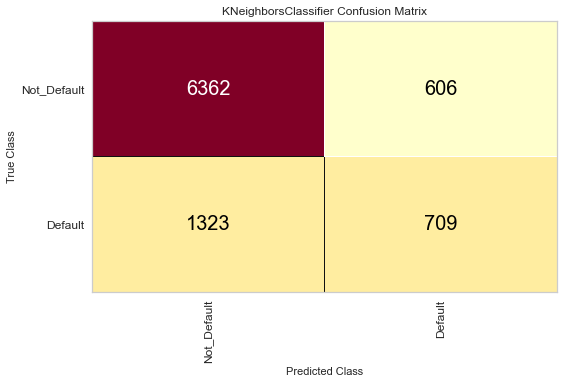

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Not_Default','Default']
cm = ConfusionMatrix(classifier4, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

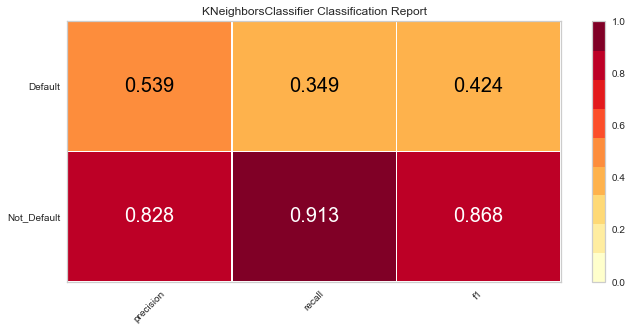

In [33]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(classifier4, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

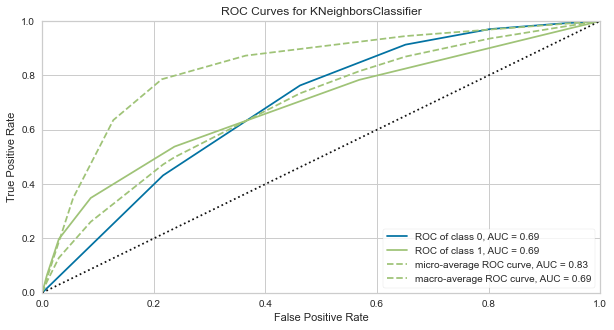

In [34]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(classifier4)

#print(y_val)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

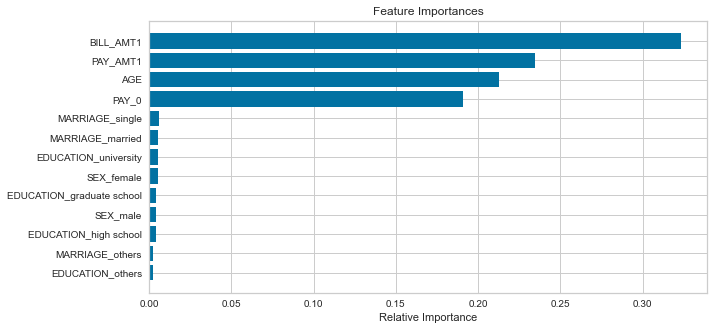

In [35]:
#Feature Importance
importances = classifier.feature_importances_
features = X_train.columns
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()